# Epilepsy_Prediction

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
Data=pd.read_csv("Epilepcy _datasets.csv")
Data.head()

FirstName  LastName   Age  Gender  Weight  Heredity  Diabetes  Asthma  \
0    AMGOTH  Vyshnavi    20       0      43         0         1       0   
1    ANGIDI     Vishnu   19       1      45         0         1       1   
2  BADAVATH    Sahasra   17       0      43         1         1       1   
3     BANDI    Akshara   16       0      38         1         1       1   
4  BEKKANTI   Santosh    45       1      68         1         1       1   

   Drug_Consumption  Alcohol_Consumption  ...  Stress  Blood_Pressure  Fever  \
0                 0                    0  ...       1               1      1   
1                 0                    1  ...       1               2      1   
2                 0                    0  ...       1               2      2   
3                 1                    0  ...       0               2      0   
4                 0                    1  ...       1               2      0   

   Lack_of_Sleep  Heart_Stroke  Brain_tumor(stage)  Brain_Injuries  \
0              1             1                   4               0   
1              1             1                   0               0   
2              1             1                   0               0   
3              1             1                   0               1   
4              1             1                   0               0   

   Frequent_consumption_of_junkfood  Seizures_time_Duration  Affected  
0                                 1                       3         1  
1                                 1                       2         1  
2                                 1                       1         1  
3                                 1                       2         1  
4                                 0                       2         1  

[5 rows x 21 columns]

In [3]:
pd.DataFrame(Data)

FirstName  LastName   Age  Gender  Weight  Heredity  Diabetes  Asthma  \
0          AMGOTH  Vyshnavi    20       0      43         0         1       0   
1          ANGIDI     Vishnu   19       1      45         0         1       1   
2        BADAVATH    Sahasra   17       0      43         1         1       1   
3           BANDI    Akshara   16       0      38         1         1       1   
4        BEKKANTI   Santosh    45       1      68         1         1       1   
...           ...        ...  ...     ...     ...       ...       ...     ...   
1768     NYATHARI      REDDY   18       1      50         0         1       0   
1769    SARIGANTI      REDDY   40       1      50         0         1       0   
1770     SHIMRANA    Jayanth   36       1      49         0         1       1   
1771  THELLAPELLI    CHANDRA   30       1      79         1         0       0   
1772      VADNALA      RAHUL   45       1      80         0         1       1   

      Drug_Consumption  Alcohol_Consumption  ...  Stress  Blood_Pressure  \
0                    0                    0  ...       1               1   
1                    0                    1  ...       1               2   
2                    0                    0  ...       1               2   
3                    1                    0  ...       0               2   
4                    0                    1  ...       1               2   
...                ...                  ...  ...     ...             ...   
1768                 0                    1  ...       1               0   
1769                 0                    0  ...       1               0   
1770                 1                    1  ...       0               1   
1771                 1                    1  ...       1               1   
1772                 1                    1  ...       1               0   

      Fever  Lack_of_Sleep  Heart_Stroke  Brain_tumor(stage)  Brain_Injuries  \
0         1              1             1                   4               0   
1         1              1             1                   0               0   
2         2              1             1                   0               0   
3         0              1             1                   0               1   
4         0              1             1                   0               0   
...     ...            ...           ...                 ...             ...   
1768      1              1             1                   2               1   
1769      0              1             1                   1               0   
1770      1              1             1                   0               0   
1771      1              1             1                   0               0   
1772      1              0             1                   3               1   

      Frequent_consumption_of_junkfood  Seizures_time_Duration  Affected  
0                                    1                       3         1  
1                                    1                       2         1  
2                                    1                       1         1  
3                                    1                       2         1  
4                                    0                       2         1  
...                                ...                     ...       ...  
1768                                 1                       2         1  
1769                                 1                       0         0  
1770                                 1                       2         0  
1771                                 1                       1         0  
1772                                 1                       1         0  

[1773 rows x 21 columns]

 # EDAüîéüßπ

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   FirstName                         1773 non-null   object
 1   LastName                          1773 non-null   object
 2   Age                               1773 non-null   int64 
 3   Gender                            1773 non-null   int64 
 4   Weight                            1773 non-null   int64 
 5   Heredity                          1773 non-null   int64 
 6   Diabetes                          1773 non-null   int64 
 7   Asthma                            1773 non-null   int64 
 8   Drug_Consumption                  1773 non-null   int64 
 9   Alcohol_Consumption               1773 non-null   int64 
 10  Hormonal_Imbalance                1773 non-null   int64 
 11  Stress                            1773 non-null   int64 
 12  Blood_Pressure      

In [5]:
# num of row and col
Data.shape 

(1773, 21)

In [6]:
#statistic of dataset
pd.options.display.float_format='{:,.2f}'.format
Data.describe()

Age   Gender   Weight  Heredity  Diabetes   Asthma  \
count 1,773.00 1,773.00 1,773.00  1,773.00  1,773.00 1,773.00   
mean     28.11     0.61    55.34      0.61      0.51     0.54   
std      13.67     0.49    14.01      0.49      0.50     0.50   
min      10.00     0.00    23.00      0.00      0.00     0.00   
25%      19.00     0.00    45.00      0.00      0.00     0.00   
50%      22.00     1.00    55.00      1.00      1.00     1.00   
75%      34.00     1.00    65.00      1.00      1.00     1.00   
max      82.00     1.00   100.00      1.00      1.00     1.00   

       Drug_Consumption  Alcohol_Consumption  Hormonal_Imbalance   Stress  \
count          1,773.00             1,773.00            1,773.00 1,773.00   
mean               0.35                 0.40                0.48     0.73   
std                0.48                 0.49                0.50     0.44   
min                0.00                 0.00                0.00     0.00   
25%                0.00                 0.00                0.00     0.00   
50%                0.00                 0.00                0.00     1.00   
75%                1.00                 1.00                1.00     1.00   
max                1.00                 1.00                1.00     1.00   

       Blood_Pressure    Fever  Lack_of_Sleep  Heart_Stroke  \
count        1,773.00 1,773.00       1,773.00      1,773.00   
mean             0.92     0.79           0.68          0.30   
std              0.64     0.69           0.47          0.46   
min              0.00     0.00           0.00          0.00   
25%              0.00     0.00           0.00          0.00   
50%              1.00     1.00           1.00          0.00   
75%              1.00     1.00           1.00          1.00   
max              2.00     2.00           1.00          1.00   

       Brain_tumor(stage)  Brain_Injuries  Frequent_consumption_of_junkfood  \
count            1,773.00        1,773.00                          1,773.00   
mean                 0.86            0.59                              0.70   
std                  1.20            0.49                              0.46   
min                  0.00            0.00                              0.00   
25%                  0.00            0.00                              0.00   
50%                  0.00            1.00                              1.00   
75%                  2.00            1.00                              1.00   
max                  4.00            1.00                              1.00   

       Seizures_time_Duration  Affected  
count                1,773.00  1,773.00  
mean                     1.19      0.61  
std                      1.08      0.49  
min                      0.00      0.00  
25%                      0.00      0.00  
50%                      1.00      1.00  
75%                      2.00      1.00  
max                      3.00      1.00

In [7]:
# duplication?    no duplication 
Data.duplicated().sum()

0

In [8]:
# missing value??   no missing value 
Data.isnull().sum() 

FirstName                           0
LastName                            0
Age                                 0
Gender                              0
Weight                              0
Heredity                            0
Diabetes                            0
Asthma                              0
Drug_Consumption                    0
Alcohol_Consumption                 0
Hormonal_Imbalance                  0
Stress                              0
Blood_Pressure                      0
Fever                               0
Lack_of_Sleep                       0
Heart_Stroke                        0
Brain_tumor(stage)                  0
Brain_Injuries                      0
Frequent_consumption_of_junkfood    0
Seizures_time_Duration              0
Affected                            0
dtype: int64

In [9]:
#Droping FirstName &LastName Column
Data= Data.drop(Data.columns[[0, 1]],axis = 1)

In [10]:
Data.columns

Index(['Age', 'Gender', 'Weight', 'Heredity', 'Diabetes', 'Asthma',
       'Drug_Consumption', 'Alcohol_Consumption', 'Hormonal_Imbalance',
       'Stress', 'Blood_Pressure', 'Fever', 'Lack_of_Sleep', 'Heart_Stroke',
       'Brain_tumor(stage)', 'Brain_Injuries',
       'Frequent_consumption_of_junkfood', 'Seizures_time_Duration',
       'Affected'],
      dtype='object')

In [11]:
# unique values 
Data.nunique()

Age                                 49
Gender                               2
Weight                              56
Heredity                             2
Diabetes                             2
Asthma                               2
Drug_Consumption                     2
Alcohol_Consumption                  2
Hormonal_Imbalance                   2
Stress                               2
Blood_Pressure                       3
Fever                                3
Lack_of_Sleep                        2
Heart_Stroke                         2
Brain_tumor(stage)                   5
Brain_Injuries                       2
Frequent_consumption_of_junkfood     2
Seizures_time_Duration               4
Affected                             2
dtype: int64

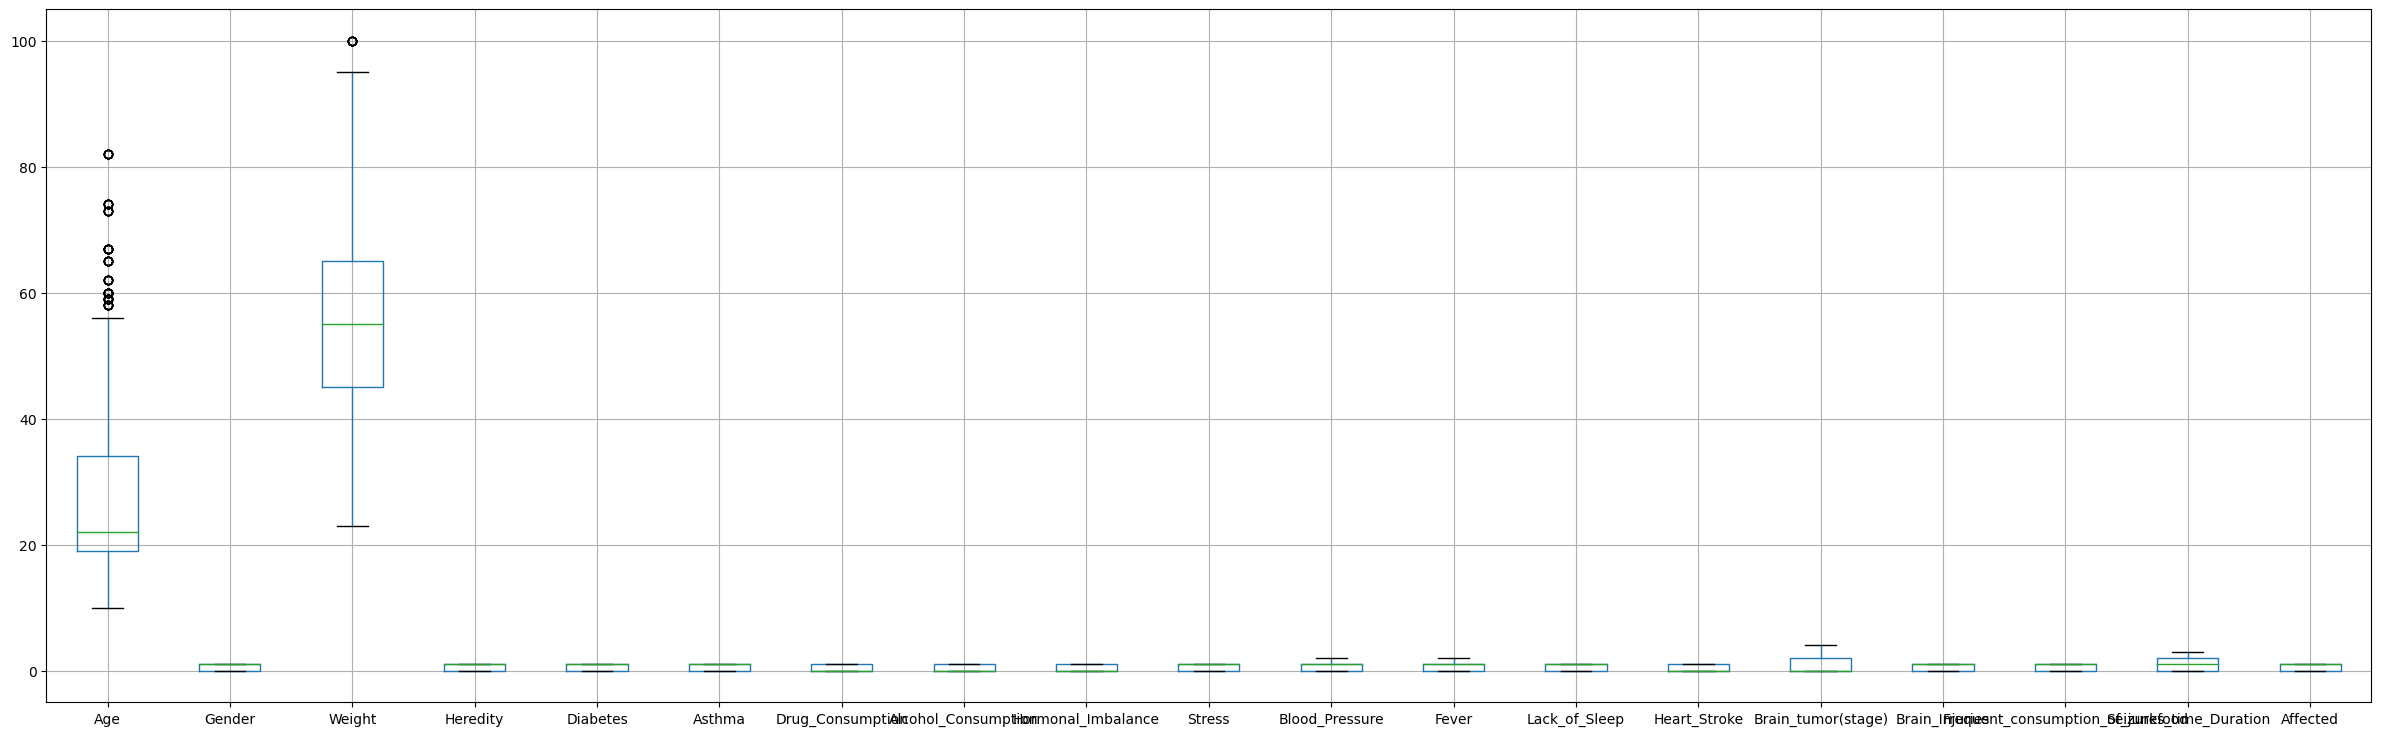

In [12]:
# outliers 
Data.boxplot(figsize=(30,9))
plt.show()

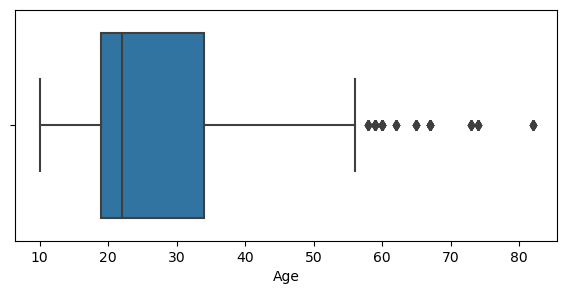

In [13]:
# check outliers
plt.figure(figsize=(7,3))
sns.boxplot(Data["Age"])
plt.show()

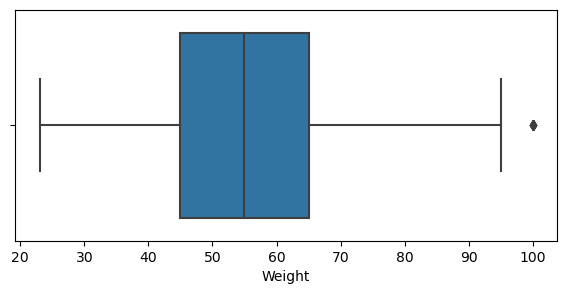

In [14]:
# check outliers
plt.figure(figsize=(7,3))
sns.boxplot(Data["Weight"])
plt.show()

In [15]:
 #drop outlier points from 'Weight'.
Data=Data[Data['Weight'] <= 95]

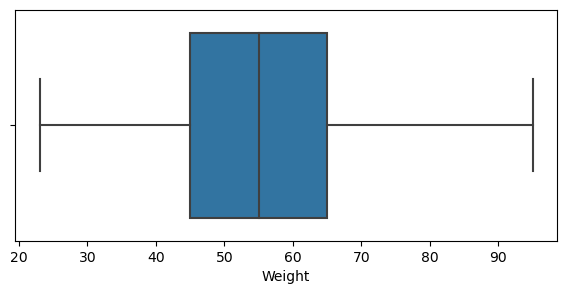

In [16]:
# check outliers again
plt.figure(figsize=(7,3))
sns.boxplot(Data["Weight"])
plt.show()

In [17]:
cor= Data.select_dtypes(exclude=object).corr()
cor

Age  Gender  Weight  Heredity  Diabetes  \
Age                               1.00    0.01    0.68      0.02      0.11   
Gender                            0.01    1.00    0.02      0.04     -0.00   
Weight                            0.68    0.02    1.00     -0.07     -0.08   
Heredity                          0.02    0.04   -0.07      1.00      0.42   
Diabetes                          0.11   -0.00   -0.08      0.42      1.00   
Asthma                           -0.04   -0.02   -0.19      0.39      0.32   
Drug_Consumption                  0.08   -0.00   -0.02      0.38      0.43   
Alcohol_Consumption               0.22    0.10    0.28      0.08      0.11   
Hormonal_Imbalance                0.04   -0.05   -0.08      0.32      0.40   
Stress                            0.05    0.04   -0.01      0.30      0.34   
Blood_Pressure                    0.18    0.07    0.22     -0.02     -0.14   
Fever                             0.09   -0.02    0.00      0.07      0.20   
Lack_of_Sleep                    -0.03    0.01   -0.12      0.27      0.39   
Heart_Stroke                      0.01   -0.12   -0.03     -0.03      0.01   
Brain_tumor(stage)               -0.03   -0.02   -0.11      0.35      0.45   
Brain_Injuries                    0.06   -0.01   -0.11      0.34      0.33   
Frequent_consumption_of_junkfood -0.21   -0.02   -0.24      0.37      0.35   
Seizures_time_Duration            0.09   -0.01   -0.06      0.30      0.43   
Affected                          0.02   -0.04   -0.13      0.43      0.45   

                                  Asthma  Drug_Consumption  \
Age                                -0.04              0.08   
Gender                             -0.02             -0.00   
Weight                             -0.19             -0.02   
Heredity                            0.39              0.38   
Diabetes                            0.32              0.43   
Asthma                              1.00              0.36   
Drug_Consumption                    0.36              1.00   
Alcohol_Consumption                 0.13              0.22   
Hormonal_Imbalance                  0.44              0.38   
Stress                              0.25              0.22   
Blood_Pressure                     -0.07             -0.14   
Fever                               0.10              0.15   
Lack_of_Sleep                       0.27              0.31   
Heart_Stroke                        0.02              0.04   
Brain_tumor(stage)                  0.43              0.52   
Brain_Injuries                      0.44              0.37   
Frequent_consumption_of_junkfood    0.34              0.30   
Seizures_time_Duration              0.32              0.40   
Affected                            0.40              0.44   

                                  Alcohol_Consumption  Hormonal_Imbalance  \
Age                                              0.22                0.04   
Gender                                           0.10               -0.05   
Weight                                           0.28               -0.08   
Heredity                                         0.08                0.32   
Diabetes                                         0.11                0.40   
Asthma                                           0.13                0.44   
Drug_Consumption                                 0.22                0.38   
Alcohol_Consumption                              1.00               -0.02   
Hormonal_Imbalance                              -0.02                1.00   
Stress                                           0.18                0.22   
Blood_Pressure                                   0.12                0.00   
Fever                                            0.09                0.16   
Lack_of_Sleep                                    0.01                0.28   
Heart_Stroke                                     0.00                0.01   
Brain_tumor(stage)                               0.11                0.32   
B

 # Analysisüìù & Visualiationüìä

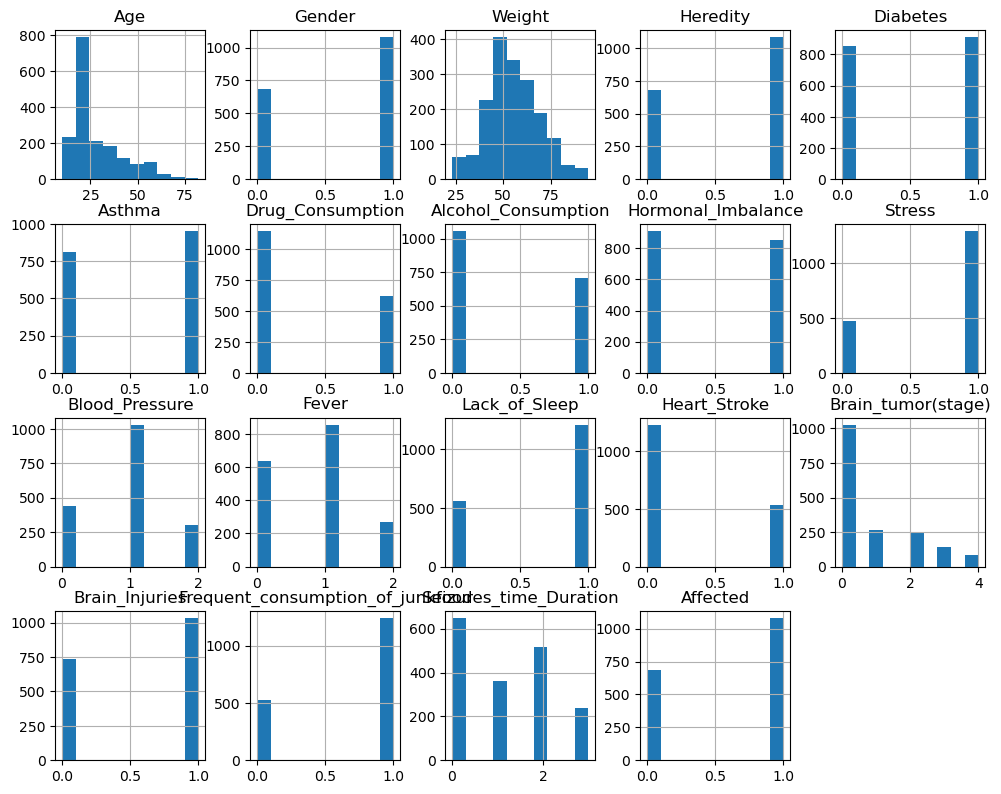

In [18]:
#distribution of
Data.hist(figsize=(12,12),layout=(5,5))
plt.show()

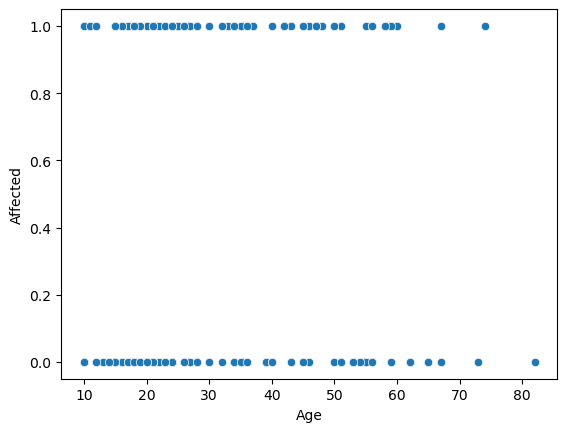

In [19]:
# distribution of data between Affected and Age
sns.scatterplot(x=Data.Age,y= Data.Affected)
plt.show()

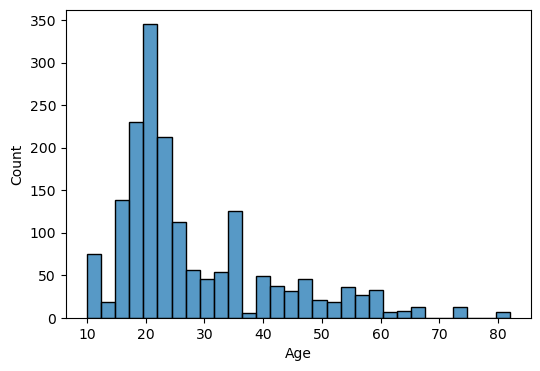

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(Data.Age, bins=30)
plt.show()

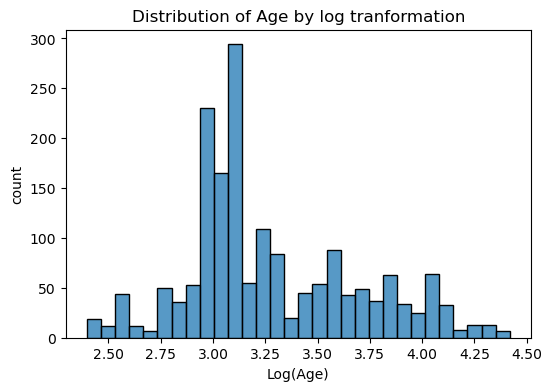

In [21]:
#distribution of log tranformation
Data['log_Age'] = np.log1p(Data.Age)
plt.figure(figsize=(6, 4))
sns.histplot(Data.log_Age, bins=30)
plt.ylabel('count')
plt.xlabel('Log(Age)')
plt.title('Distribution of Age by log tranformation')
plt.show()

In [22]:
Data.Age.skew()

1.4080467480387282

In [23]:
Data.log_Age.skew()

0.5656785416907414

In [24]:
Data.columns

Index(['Age', 'Gender', 'Weight', 'Heredity', 'Diabetes', 'Asthma',
       'Drug_Consumption', 'Alcohol_Consumption', 'Hormonal_Imbalance',
       'Stress', 'Blood_Pressure', 'Fever', 'Lack_of_Sleep', 'Heart_Stroke',
       'Brain_tumor(stage)', 'Brain_Injuries',
       'Frequent_consumption_of_junkfood', 'Seizures_time_Duration',
       'Affected', 'log_Age'],
      dtype='object')

In [25]:
Data.drop('Age', axis=1, inplace=True)
Data.head()

Gender  Weight  Heredity  Diabetes  Asthma  Drug_Consumption  \
0       0      43         0         1       0                 0   
1       1      45         0         1       1                 0   
2       0      43         1         1       1                 0   
3       0      38         1         1       1                 1   
4       1      68         1         1       1                 0   

   Alcohol_Consumption  Hormonal_Imbalance  Stress  Blood_Pressure  Fever  \
0                    0                   0       1               1      1   
1                    1                   0       1               2      1   
2                    0                   1       1               2      2   
3                    0                   1       0               2      0   
4                    1                   0       1               2      0   

   Lack_of_Sleep  Heart_Stroke  Brain_tumor(stage)  Brain_Injuries  \
0              1             1                   4               0   
1              1             1                   0               0   
2              1             1                   0               0   
3              1             1                   0               1   
4              1             1                   0               0   

   Frequent_consumption_of_junkfood  Seizures_time_Duration  Affected  log_Age  
0                                 1                       3         1     3.04  
1                                 1                       2         1     3.00  
2                                 1                       1         1     2.89  
3                                 1                       2         1     2.83  
4                                 0                       2         1     3.83

In [26]:
#male 1 
#female 0
Data["Gender"].value_counts()

1    1079
0     687
Name: Gender, dtype: int64

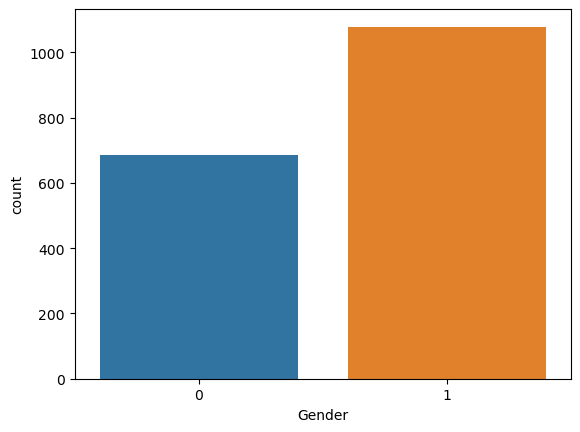

In [27]:
#How many values there in two categoris --> we can use value_counts() function
#we have observed that count of male is grater than female
sns.countplot(x='Gender',data=Data)
plt.show()

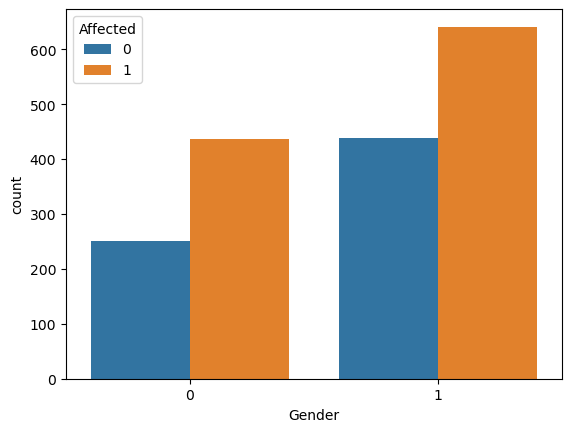

In [28]:
# #of infected male is greater than uninfected male and also female 
sns.countplot(x='Gender',data=Data,hue='Affected')
plt.show()

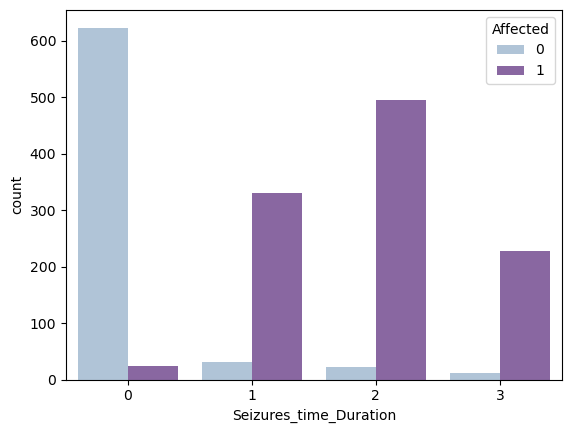

In [29]:
sns.countplot(x='Seizures_time_Duration',data=Data, hue='Affected', palette='BuPu' )
plt.show()

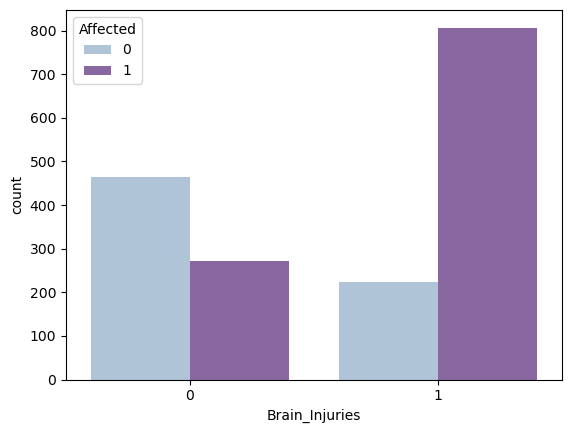

In [30]:
sns.countplot(x='Brain_Injuries',data=Data, hue='Affected', palette='BuPu' )
plt.show()

0    647
2    517
1    362
3    240
Name: Seizures_time_Duration, dtype: int64


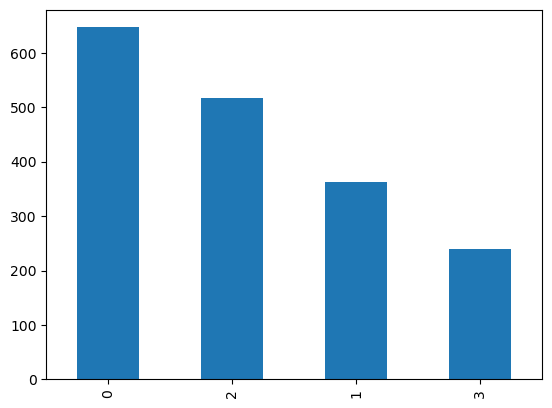

In [31]:
print(Data.Seizures_time_Duration.value_counts())
Data.Seizures_time_Duration.value_counts().plot.bar()
plt.show()

In [32]:
Data['Affected'].value_counts()

1    1078
0     688
Name: Affected, dtype: int64

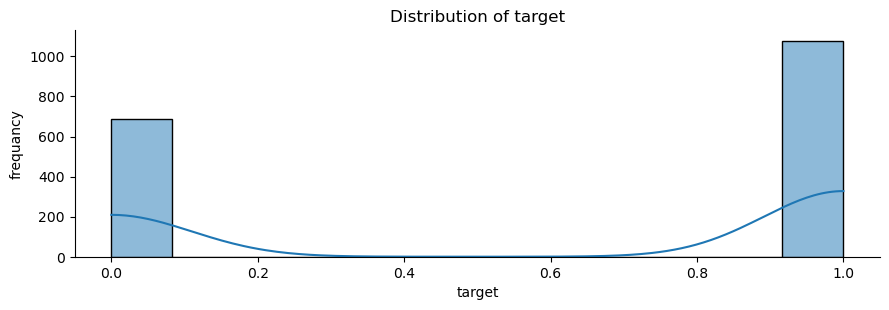

In [33]:
sns.displot(Data['Affected'],kde =True,height=3,aspect=3)
plt.xlabel("target")
plt.ylabel("frequancy")
plt.title("Distribution of target")
plt.show()

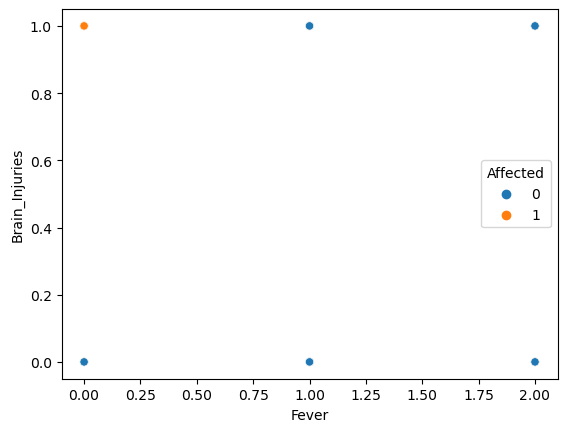

In [4]:
sns.scatterplot(x='Fever',y = 'Brain_Injuries',hue = 'Affected',data = Data)
plt.show()

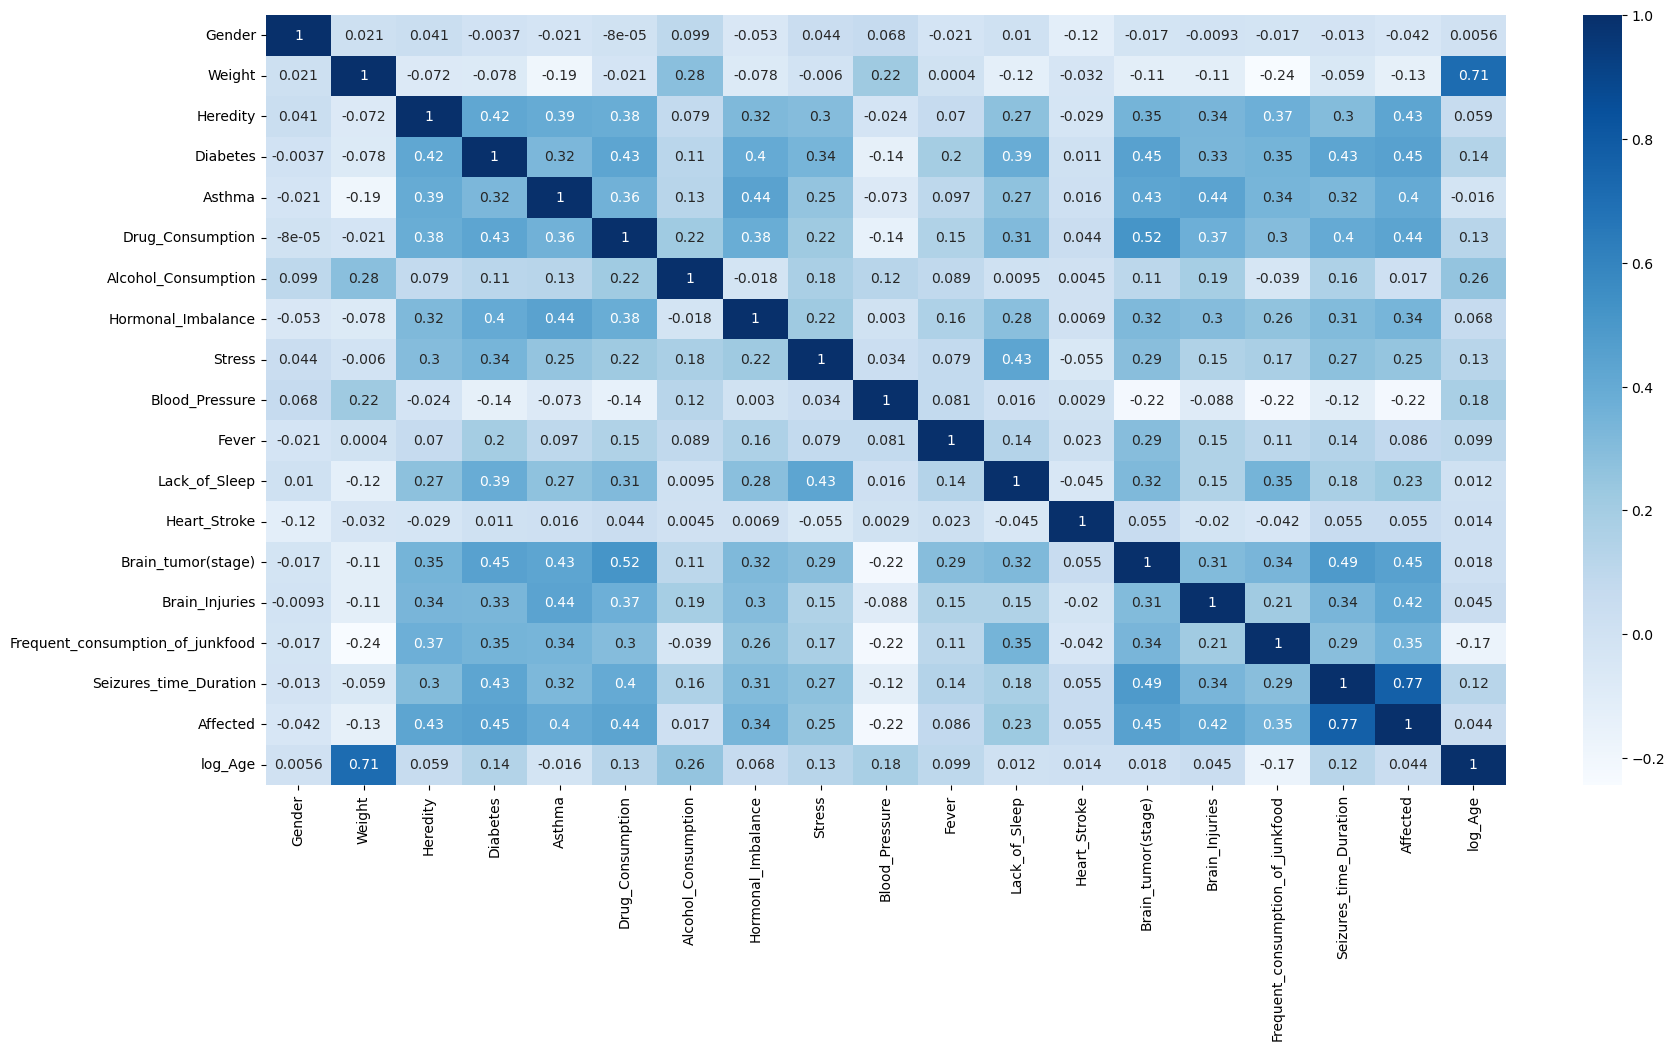

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(Data.corr(), annot=True, cmap='Blues')
plt.show()

# Feature Scaling 

In [36]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(Data)
pd.DataFrame(X)


0     1     2     3     4     5     6     7     8     9     10    11  \
0    -1.25 -0.88 -1.26  0.97 -1.08 -0.74 -0.82 -0.97  0.60  0.12  0.30  0.68   
1     0.80 -0.74 -1.26  0.97  0.92 -0.74  1.22 -0.97  0.60  1.68  0.30  0.68   
2    -1.25 -0.88  0.79  0.97  0.92 -0.74 -0.82  1.03  0.60  1.68  1.76  0.68   
3    -1.25 -1.25  0.79  0.97  0.92  1.36 -0.82  1.03 -1.66  1.68 -1.15  0.68   
4     0.80  0.93  0.79  0.97  0.92 -0.74  1.22 -0.97  0.60  1.68 -1.15  0.68   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1761  0.80 -0.38 -1.26  0.97 -1.08 -0.74  1.22 -0.97  0.60 -1.44  0.30  0.68   
1762  0.80 -0.38 -1.26  0.97 -1.08 -0.74 -0.82  1.03  0.60 -1.44 -1.15  0.68   
1763  0.80 -0.45 -1.26  0.97  0.92  1.36  1.22  1.03 -1.66  0.12  0.30  0.68   
1764  0.80  1.73  0.79 -1.03 -1.08  1.36  1.22  1.03  0.60  0.12  0.30  0.68   
1765  0.80  1.81 -1.26  0.97  0.92  1.36  1.22  1.03  0.60 -1.44  0.30 -1.47   

       12    13    14    15    16    17    18  
0    1.51  2.61 -1.18  0.65  1.67  0.80 -0.56  
1    1.51 -0.71 -1.18  0.65  0.74  0.80 -0.68  
2    1.51 -0.71 -1.18  0.65 -0.18  0.80 -0.93  
3    1.51 -0.71  0.84  0.65  0.74  0.80 -1.07  
4    1.51 -0.71 -1.18 -1.53  0.74  0.80  1.34  
...   ...   ...   ...   ...   ...   ...   ...  
1761 1.51  0.95  0.84  0.65  0.74  0.80 -0.80  
1762 1.51  0.12 -1.18  0.65 -1.11 -1.25  1.06  
1763 1.51 -0.71 -1.18  0.65  0.74 -1.25  0.81  
1764 1.51 -0.71 -1.18  0.65 -0.18 -1.25  0.38  
1765 1.51  1.78  0.84  0.65 -0.18 -1.25  1.34  

[1766 rows x 19 columns]

# Feature Selection 

In [37]:
x= Data.drop('Affected',axis=1)
y= Data['Affected']

In [38]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

def wrapper_method(x, y, model=LogisticRegression()):
    sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward')
  
    sfs.fit(x, y)
    selected_features = sfs.support_
    return selected_features 

In [39]:
wrapper_method(x, y, model=LogisticRegression())

array([False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False, False, False,  True,  True,  True,  True])

In [ ]:
# feature important using Random Forest 

In [67]:
#The higher the Gini importance, the more important the feature is for the model
importances = rfc.feature_importances_

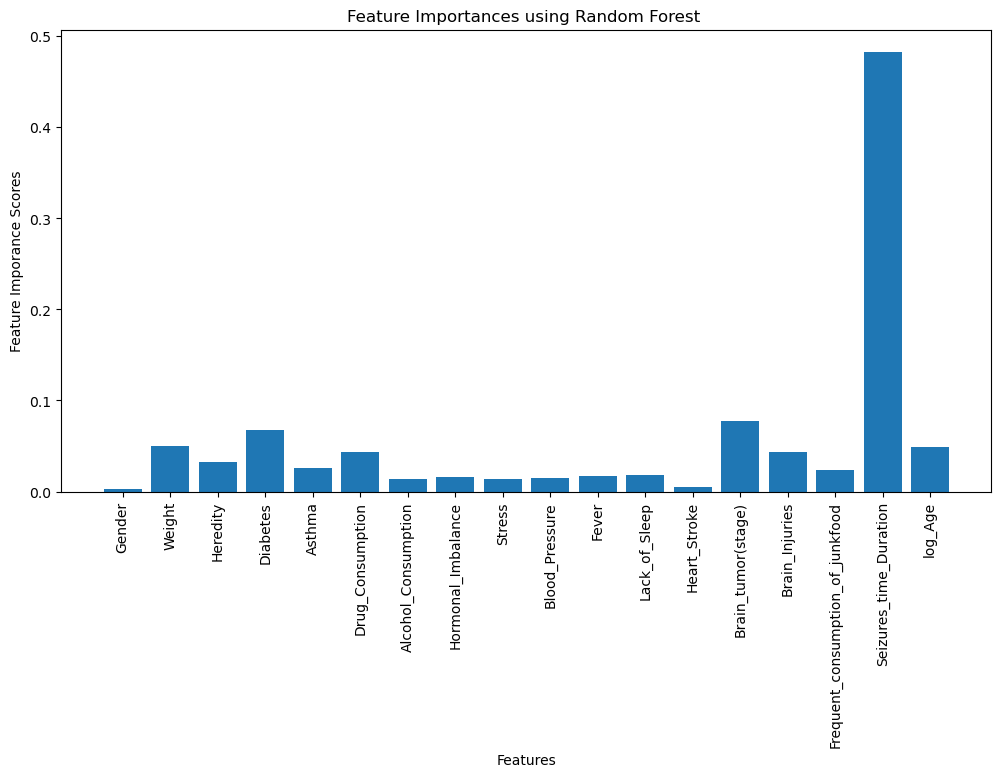

In [71]:
plt.figure(figsize=(12, 6))
plt.bar(range(x.shape[1]), importances)
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
plt.ylabel('Feature Imporance Scores')
plt.xlabel('Features')
plt.title('Feature Importances using Random Forest ')
plt.show()

# Train-Test-Split

In [40]:
# 70% for train and 30% for test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
print('x_train:', x_train.size)
print('x_test:',x_test.size)
print('y_train:', y_train.size)
print('y_test:', y_test.size)

x_train: 22248
x_test: 9540
y_train: 1236
y_test: 530


# Logistic regression




In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model=lr.fit(x_train,y_train)
prediction=model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction)
cm

array([[170,  21],
       [ 17, 322]], dtype=int64)

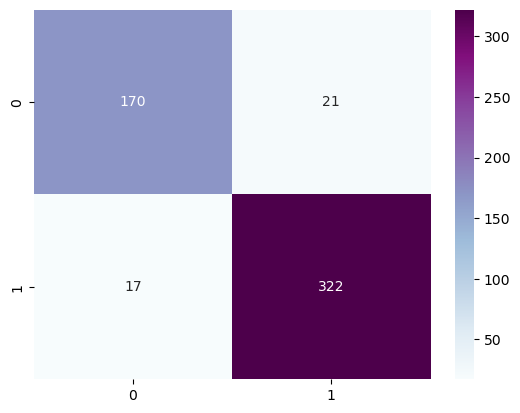

In [44]:
sns.heatmap(cm,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [45]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,prediction)
print(acc*100)

92.83018867924528


# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model2 = rfc.fit(x_train, y_train)
prediction2 = model2.predict(x_test)
confusion_matrix(y_test, prediction2)


array([[184,   7],
       [  0, 339]], dtype=int64)

In [47]:
cm2=confusion_matrix(y_test,prediction)
cm2

array([[170,  21],
       [ 17, 322]], dtype=int64)

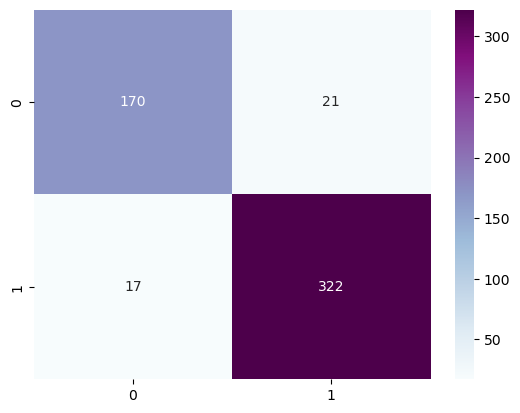

In [48]:
sns.heatmap(cm2,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [49]:
acc=accuracy_score(y_test,prediction2)
print(acc*100)

98.67924528301887


# Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(min_samples_split=3)
model3=dtc.fit(x_train,y_train)
prediction3=model3.predict(x_test)
cm3= confusion_matrix(y_test,prediction3)
cm3

array([[187,   4],
       [  2, 337]], dtype=int64)

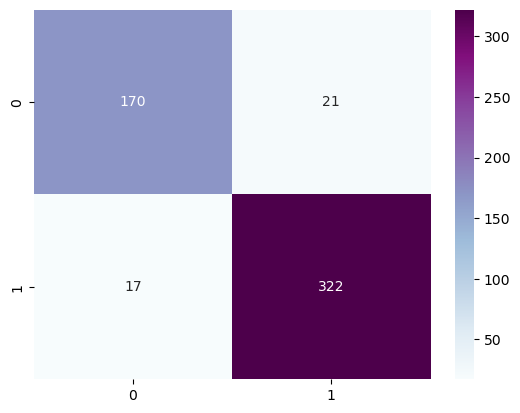

In [52]:
sns.heatmap(cm,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [53]:
print(accuracy_score(y_test,prediction3)*100)

98.86792452830188


# SVM

In [54]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
model4=svm.fit(x_train,y_train)
prediction4=model4.predict(x_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[169,  22],
       [  7, 332]], dtype=int64)

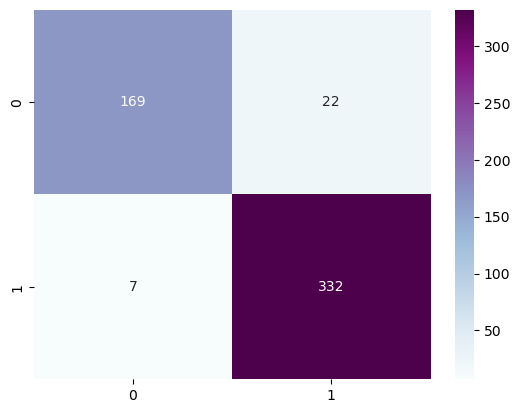

In [55]:
sns.heatmap(cm4,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [56]:
print(accuracy_score(y_test,prediction4)*100)

94.52830188679245


# Naive Byes 

In [57]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
model5 = NB.fit(x_train, y_train)
prediction5 = model5.predict(x_test)
cm5= confusion_matrix(y_test, prediction5)
cm5

array([[164,  27],
       [ 54, 285]], dtype=int64)

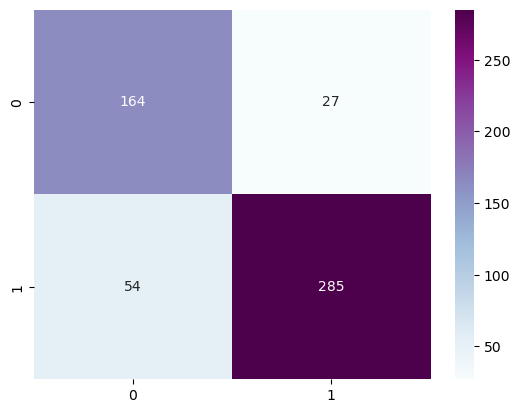

In [58]:
sns.heatmap(cm5,annot=True,cmap='BuPu',fmt=".0f")
plt.show()

In [59]:
print(accuracy_score(y_test,prediction5)*100)

84.71698113207547
